# a. Pre-processing: #

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, 
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print(os.listdir())

['.ipynb_checkpoints', 'data_description.txt', 'sample_submission.csv', 'sample_submission.csv.gz', 'test.csv', 'test.csv.gz', 'trabalho_ML.ipynb', 'train.csv', 'train.csv.gz']


In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# b. Visualizing the Data:

In [3]:
description_file = open("data_description.txt")
print(description_file.read())
description_file.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
pd.set_option('display.max_columns', None)
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


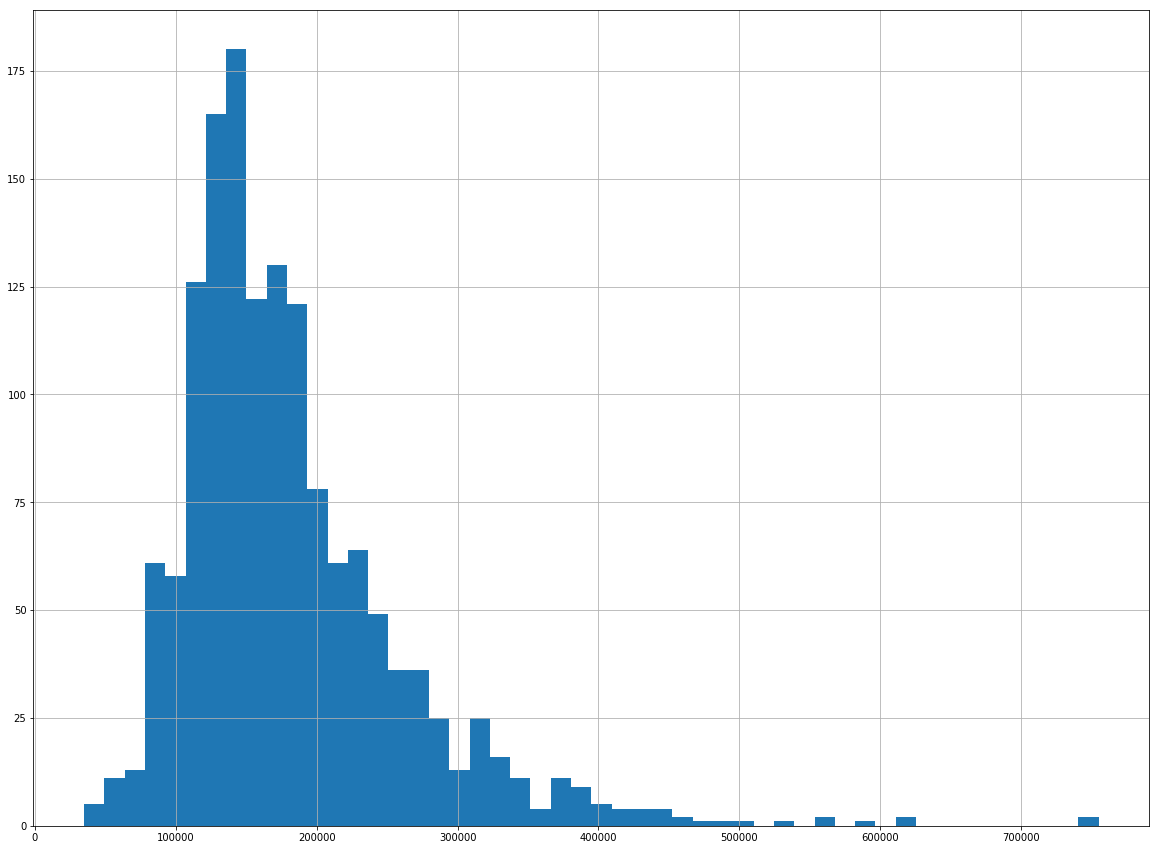

In [8]:
train_data["SalePrice"].hist(bins = 50, figsize=(20,15))
plt.show()

In [9]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Looking for correlations:

In [10]:
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1075ee588>,
      dtype=object)

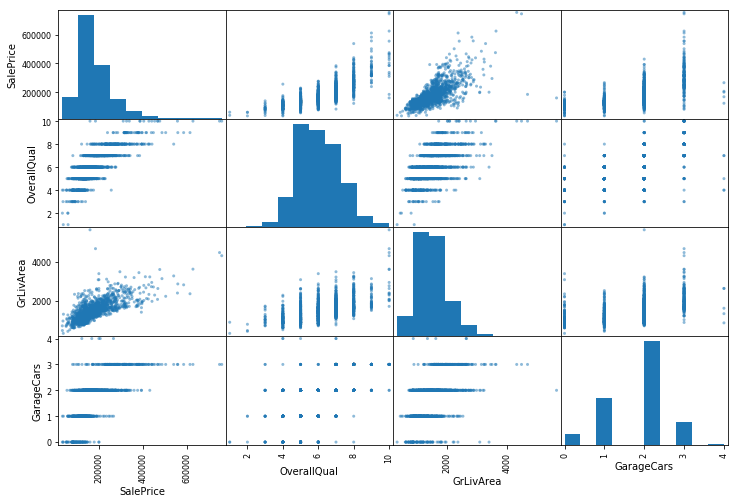

In [11]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
scatter_matrix(train_data[attributes], figsize = (12,8))

Looks like theres a quadratic correlation between these values.

# c. Cleaning missing attributes:

In [12]:
missing_train_values = train_data.columns[train_data.isnull().any()]
missing_train_values_count = train_data[missing_train_values].isnull().sum()
missing_train_values_count

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
missing_test_values = test_data.columns[test_data.isnull().any()]
missing_test_values_count = test_data[missing_test_values].isnull().sum()
missing_test_values_count

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Checking on the documentation, some of these nill values on the dataframe are associated with an empty value (example: There are no tennis court in this house. There aren't fences in this house.)

For this reason, we should set a value "None" to these situations.

In [14]:
attributes_with_none_value = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                              "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC",
                              "Fence", "MiscFeature"]

For LotFrontage, since there are no values below 21, first I'll assume it missing values should be zero.
For MasVnrType, MasVnrArea, GarageYrBlt, GarageArea and GarageCars I'll also assume these missing values should be "None" and zero.

In [15]:
attributes_with_none_value.append("MasVnrType")
attributes_with_zero_value = ["LotFrontage", "GarageYrBlt", "GarageArea", "GarageCars", "MasVnrArea"]

In [16]:
train_data[attributes_with_none_value] = train_data[attributes_with_none_value].fillna(value="None")
test_data[attributes_with_none_value] = test_data[attributes_with_none_value].fillna(value="None")
train_data[attributes_with_zero_value] = train_data[attributes_with_zero_value].fillna(value=0)
test_data[attributes_with_zero_value] = test_data[attributes_with_zero_value].fillna(value=0)

In [17]:
missing_train_values = train_data.columns[train_data.isnull().any()]
missing_train_values_count = train_data[missing_train_values].isnull().sum()
missing_train_values_count

Electrical    1
dtype: int64

In [18]:
missing_test_values = test_data.columns[test_data.isnull().any()]
missing_test_values_count = test_data[missing_test_values].isnull().sum()
missing_test_values_count

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

For the remaining string attributes, it will be set with it's most frequent values:

In [19]:
train_data = train_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
test_data = test_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
missing_train_values = train_data.columns[train_data.isnull().any()]
missing_train_values_count = train_data[missing_train_values].isnull().sum()
missing_train_values_count

Series([], dtype: float64)

In [21]:
missing_test_values = test_data.columns[test_data.isnull().any()]
missing_test_values_count = test_data[missing_test_values].isnull().sum()
missing_test_values_count

Series([], dtype: float64)

Ok, we are good to go.

# d. Encoding String values:

In [22]:
train_data.shape

(1460, 81)

In [23]:
test_data.shape

(1459, 80)

Since MSSubClass is a not linear classification, we will add it to the one hot encoding.

In [24]:
linear_encoding_attributes = ["LotShape", "LandContour", "GarageCond", "Street","Utilities", "LandSlope", "ExterQual",  "ExterCond", "BsmtQual",
                              "BsmtCond",  "BsmtExposure", "BsmtFinType1", "BsmtFinType2",  "HeatingQC",
                              'CentralAir',  'KitchenQual',  'Functional',  'FireplaceQu', 'GarageFinish',
                              'GarageQual',  'PavedDrive',  'PoolQC' ]


onehot_encoding_attributes = [ "MSSubClass", "Alley", "MSZoning", "LotConfig", "Neighborhood", "Condition1", "Condition2",  'BldgType',
                              'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                              'Foundation', 'Heating', 'Electrical', 'GarageType',  'Fence', 'MiscFeature',
                              'SaleType',  'SaleCondition']

In [25]:
labelEncoder = LabelEncoder()
for attribute in linear_encoding_attributes:
    linear_encoded_array = labelEncoder.fit_transform(train_data[attribute])
    train_data[attribute] = linear_encoded_array
    linear_encoded_array = labelEncoder.fit_transform(test_data[attribute])
    test_data[attribute] = linear_encoded_array
    
    

In [26]:
train_data.shape

(1460, 81)

In [27]:
test_data.shape

(1459, 80)

In [28]:
for attribute in onehot_encoding_attributes:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[attribute], prefix=attribute)],axis=1)
    train_data.drop([attribute],axis=1, inplace=True)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[attribute], prefix=attribute)],axis=1)
    test_data.drop([attribute],axis=1, inplace=True)

In [29]:
train_data.shape

(1460, 240)

In [30]:
test_data.shape

(1459, 225)

In [31]:
for col in train_data.columns:
    if col not in test_data.columns and col != "SalePrice":
        test_data[col] = 0

In [32]:
test_data.shape

(1459, 240)

There are no string values anymore on the dataframes.

Let's check our new correlation matrix:

In [33]:
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
MSSubClass_60            0.377197
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF               0.324413
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
Exterior2nd_VinylSd      0.306389
Exterior1st_VinylSd      0.305009
HalfBath                 0.284108
LotArea                  0.263843
GarageYrBlt   

We have some new promissing attributes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bbf8240>,
      dtype=object)

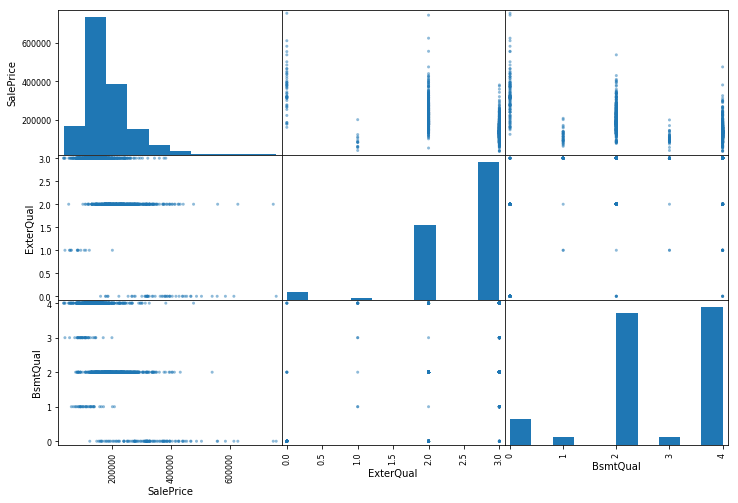

In [34]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]

attributes = ["SalePrice", "ExterQual", "BsmtQual"]
scatter_matrix(train_data[attributes], figsize = (12,8))

# e. Generating the Model:

## Linear Regression:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Populating the interactive namespace from numpy and matplotlib


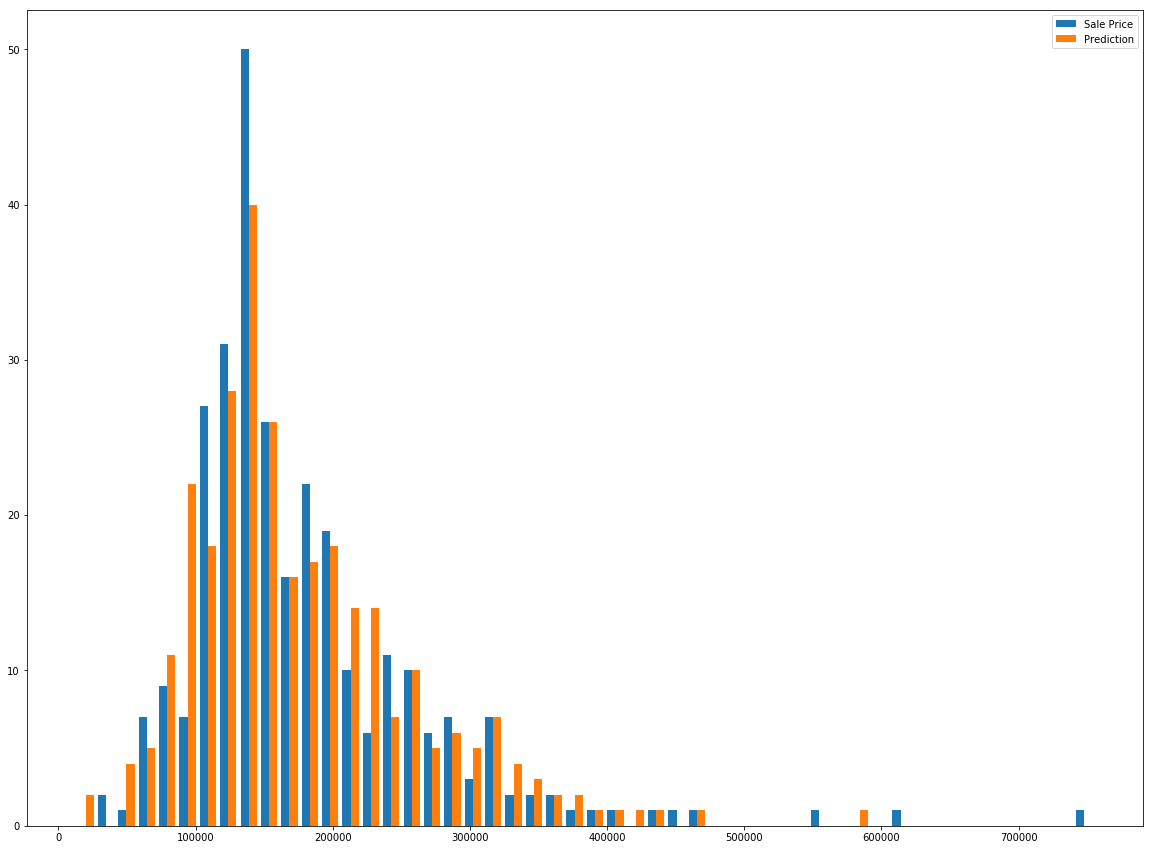

<Figure size 1440x1080 with 0 Axes>

In [35]:
train_regression_set, test_regression_set = train_test_split(train_data, test_size=0.2, random_state = 42)
regression = LinearRegression()
regression.fit(train_regression_set.drop(['SalePrice', 'Id'], axis=1), train_regression_set["SalePrice"])

predictions = regression.predict(test_regression_set.drop(['SalePrice', 'Id'], axis=1))
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
plt.hist([test_regression_set['SalePrice'], predictions], label=['Sale Price', 'Prediction'], bins=50)
plt.legend(loc='upper right')
plt.figure(figsize=(20,15))
plt.show()


In [36]:
lin_mse = mean_squared_error(test_regression_set['SalePrice'], predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

30290.96778951236

## e. Evaluating the distribution: ##
Since we have a tail-heavy distribution, it would be better for us to compute the logarithm of the SalePrice, and then train our linear regressor with it value.

In [39]:
train_data = train_data.assign(log1p_SalePrice = lambda x: np.log1p(x["SalePrice"]))
train_data.head()

Populating the interactive namespace from numpy and matplotlib


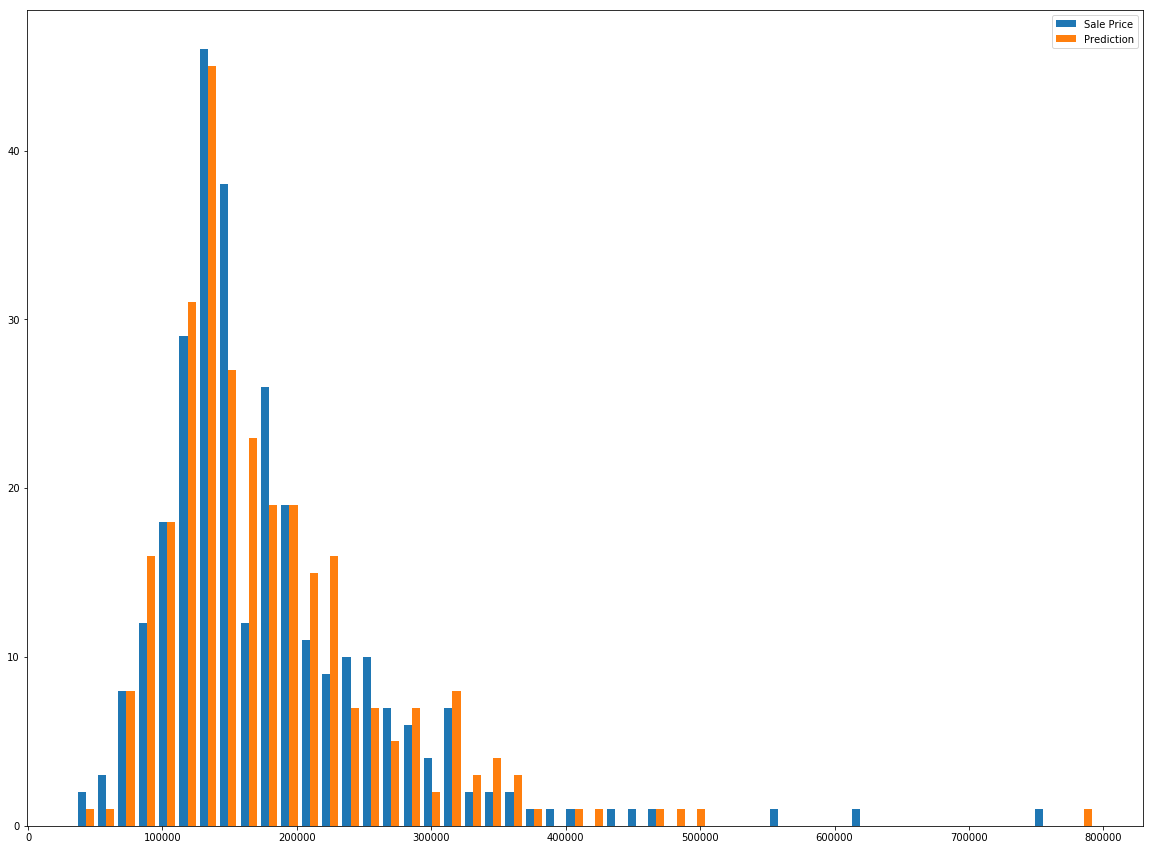

<Figure size 1440x1080 with 0 Axes>

In [44]:
train_regression_set, test_regression_set = train_test_split(train_data, test_size=0.2, random_state = 42)
regression = LinearRegression()
regression.fit(train_regression_set.drop(['SalePrice', 'Id', "log1p_SalePrice"], axis=1), train_regression_set["log1p_SalePrice"])

log1p_predictions = regression.predict(test_regression_set.drop(['SalePrice', 'Id', "log1p_SalePrice"], axis=1))
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

predictions = np.expm1(log1p_predictions)


plt.hist([test_regression_set['SalePrice'], predictions], label=['Sale Price', 'Prediction'], bins=50)
plt.legend(loc='upper right')
plt.figure(figsize=(20,15))
plt.show()

In [45]:
lin_mse = mean_squared_error(test_regression_set['SalePrice'], predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

23062.807632049044

## f. Evaluating the algorithm: ##
Let's try the Lasso Regression, since it tends to completely eliminate the weights of the least important features:

In [ ]:
regression = LassoR()
regression.fit(train_regression_set.drop(['SalePrice', 'Id', "log1p_SalePrice"], axis=1), train_regression_set["log1p_SalePrice"])

log1p_predictions = regression.predict(test_regression_set.drop(['SalePrice', 'Id', "log1p_SalePrice"], axis=1))
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

predictions = np.expm1(log1p_predictions)


plt.hist([test_regression_set['SalePrice'], predictions], label=['Sale Price', 'Prediction'], bins=50)
plt.legend(loc='upper right')
plt.figure(figsize=(20,15))
plt.show()